In [1]:
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#nltk.download('punkt')
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /home/sourav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/sourav/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/sourav/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/sourav/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/sourav/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/sourav/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading pac

True

In [3]:
def preprocess_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Remove stopwords and convert to lowercase
    stop_words = set(stopwords.words('english'))
    processed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        words = [word for word in words if word.isalnum() and word not in stop_words]
        processed_sentences.append(' '.join(words))
    
    return sentences, processed_sentences

In [4]:
def create_sentence_embeddings(processed_sentences):
    # Use TF-IDF for sentence embeddings
    vectorizer = TfidfVectorizer()
    sentence_embeddings = vectorizer.fit_transform(processed_sentences).toarray()
    return sentence_embeddings


In [5]:
def attention_mechanism(sentence_embeddings):
    # Compute attention scores using cosine similarity
    similarity_matrix = cosine_similarity(sentence_embeddings)
    
    # Normalize
    attention_weights = similarity_matrix / np.sum(similarity_matrix, axis=1, keepdims=True)
    
    return attention_weights

In [6]:
def summarize_text(sentences, attention_weights, num_sentences=3):

    sentence_scores = np.sum(attention_weights, axis=1)
    
    top_sentence_indices = sentence_scores.argsort()[-num_sentences:][::-1]
    
    summary = [sentences[i] for i in sorted(top_sentence_indices)]
    
    return summary

In [7]:
def visualize_attention(sentences, attention_weights):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights, annot=False, cmap='YlOrRd')
    plt.title('Attention Weights Heatmap')
    plt.xlabel('Sentence Index')
    plt.ylabel('Sentence Index')
    plt.show()

In [8]:
def evaluate_summary(original_text, summary):
    compression_ratio = len(' '.join(summary)) / len(original_text)
    print(f"Compression Ratio: {compression_ratio:.2f}")

In [9]:
def text_summarizer(text, num_sentences=3):
    
    original_sentences, processed_sentences = preprocess_text(text)
    
    sentence_embeddings = create_sentence_embeddings(processed_sentences)

    attention_weights = attention_mechanism(sentence_embeddings)
    
    summary = summarize_text(original_sentences, attention_weights, num_sentences)
    
    visualize_attention(original_sentences, attention_weights)
    
    evaluate_summary(text, summary)
    
    return summary

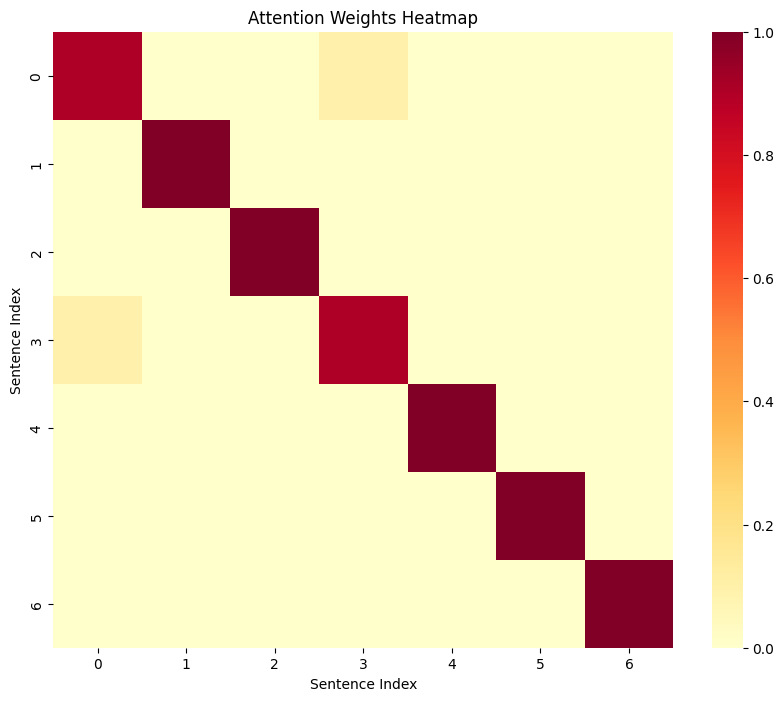

Compression Ratio: 0.43
Summary:
1. Everything that is happening
is a consequence of your actions.
2. When you think like that, you try to come upwith creative ideas to improve what you want to see.
3. That’s when the magic
happens and you pursue the greatness.


In [13]:
# Example usage
if __name__ == "__main__":
    text = """What you are saying is true, but shouldn’t you take responsibility for your life?
You were not born with these burdens. You made a choice at some point that
led you to this situation. The basic principle in life is that you must accept that
you are the most important person on this earth. Everything that is happening
is a consequence of your actions. When you think like that, you try to come upwith creative ideas to improve what you want to see. That’s when the magic
happens and you pursue the greatness.
    """
    
    summary = text_summarizer(text)
    print("Summary:")
    for i, sentence in enumerate(summary, 1):
        print(f"{i}. {sentence}")